In [13]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt


In [2]:
mnist = input_data.read_data_sets('MNIST_data')


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
feature_columns = [tf.feature_column.numeric_column("x", shape =[28,28])]
print(feature_columns)


[_NumericColumn(key='x', shape=(28, 28), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [4]:
classifier = tf.estimator.DNNClassifier(
    feature_columns = feature_columns,
    hidden_units = [256,32],
    optimizer=tf.train.AdamOptimizer(1e-4),
    n_classes = 10,
    dropout = .1,
    model_dir= "./models/mnist_model"

)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './models/mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4497d4d4e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
def input (dataset):
    return dataset.images, dataset.labels.astype(np.int32)

In [6]:
#define training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    #getting first image input
    x = {"x": input(mnist.train)[0]},
    y = input(mnist.train)[1],
    num_epochs = None,
    batch_size = 50,
    shuffle = True
    
)

In [7]:
classifier.train(input_fn = train_input_fn, steps = 1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mnist_model/model.ckpt-301000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 301001 into ./models/mnist_model/model.ckpt.
INFO:tensorflow:loss = 0.0027697673, step = 301001
INFO:tensorflow:global_step/sec: 450.533
INFO:tensorflow:loss = 0.0048229974, step = 301101 (0.223 sec)
INFO:tensorflow:global_step/sec: 544.744
INFO:tensorflow:loss = 0.009287497, step = 301201 (0.183 sec)
INFO:tensorflow:global_step/sec: 515.321
INFO:tensorflow:loss = 0.0006679772, step = 301301 (0.194 sec)
INFO:tensorflow:global_step/sec: 559.116
INFO:tensorflow:loss = 0.0010950014, step = 301401 (0.179 sec)
INFO:tensorflow:global_step/sec: 589.196
INFO:tensorflow:loss = 0.006540858, step = 301501 (0.170 sec)
INFO:tensorflow:global_step/s

In [11]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": input(mnist.test)[0]},
    y = input(mnist.test)[1],
    num_epochs = 1,
    shuffle = True
    
    
)



accuracy_score = classifier.evaluate(input_fn = test_input_fn, steps = 2000)
print(accuracy_score)
print("The accuracy for this model is", accuracy_score['accuracy']* 100, "%")

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-03-18:04:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./models/mnist_model/model.ckpt-302000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-03-18:04:04
INFO:tensorflow:Saving dict for global step 302000: accuracy = 0.9811, average_loss = 0.12888353, global_step = 302000, loss = 16.31437
{'accuracy': 0.9811, 'average_loss': 0.12888353, 'loss': 16.31437, 'global_step': 302000}
The accuracy for this model is 98.11000227928162 %


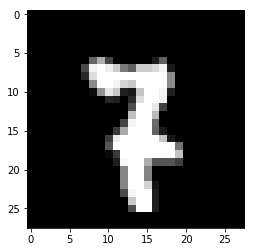

In [26]:
first_image= mnist.train.images[22]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

plt.show()